In [1]:
# Chapter 4.4

Data set is available in the data foler of thie repo, and can also be download at: https://figshare.com/articles/Mammals_Dataset/1565651

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
mammals = pd.read_csv('../data/mammals.csv')

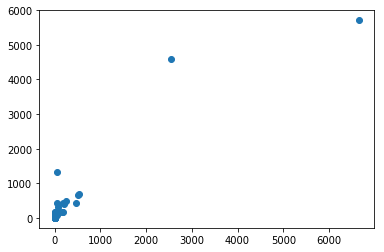

In [3]:
plt.scatter(mammals['body'],mammals['brain'])
plt.show()

In [4]:
body_data = mammals['body']
body_data.shape

(62,)

In [5]:
brain_data = mammals['brain']
brain_data.shape

(62,)

In [6]:
# Regression with statsmodels

In [7]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [8]:
body_data = sm.add_constant(body_data)

In [9]:
regression1 = sm.OLS(brain_data, body_data).fit()

In [10]:
regression2 = smf.ols(formula='brain~body',data=mammals).fit()

In [11]:
print(regression1.summary())

                            OLS Regression Results                            
Dep. Variable:                  brain   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     411.2
Date:                Sat, 18 Aug 2018   Prob (F-statistic):           1.54e-28
Time:                        10:43:15   Log-Likelihood:                -447.38
No. Observations:                  62   AIC:                             898.8
Df Residuals:                      60   BIC:                             903.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         91.0044     43.553      2.090      0.0

In [12]:
print(regression2.summary())

                            OLS Regression Results                            
Dep. Variable:                  brain   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     411.2
Date:                Sat, 18 Aug 2018   Prob (F-statistic):           1.54e-28
Time:                        10:43:15   Log-Likelihood:                -447.38
No. Observations:                  62   AIC:                             898.8
Df Residuals:                      60   BIC:                             903.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     91.0044     43.553      2.090      0.0

In [13]:
regression2.params

Intercept    91.004396
body          0.966496
dtype: float64

In [14]:
new_body = np.linspace(0,7000,10)

In [15]:
brain_pred = regression2.predict(exog=dict(body=new_body))

In [16]:
print(brain_pred)

0      91.004396
1     842.723793
2    1594.443190
3    2346.162587
4    3097.881985
5    3849.601382
6    4601.320779
7    5353.040176
8    6104.759573
9    6856.478970
dtype: float64


In [17]:
# Regression with Scikit-Learn

In [18]:
%pylab inline
import numpy as np
import pandas as pd
from sklearn import linear_model

Populating the interactive namespace from numpy and matplotlib


In [19]:
mammals = pd.read_csv('../data/mammals.csv')

In [20]:
body_data = mammals[['body']]

In [21]:
brain_data = mammals[['brain']]

In [22]:
sk_regr= linear_model.LinearRegression()

In [23]:
sk_regr.fit(body_data, brain_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
print(sk_regr.coef_)

[[ 0.96649637]]


In [25]:
print(sk_regr.intercept_)

[ 91.00439621]


In [26]:
print(sk_regr.score(body_data,brain_data))

0.872662084304


In [27]:
new_body = np.linspace(0,7000,10)
new_body = new_body[:,np.newaxis]

In [28]:
brain_pred = sk_regr.predict(new_body)

In [29]:
print(brain_pred)

[[   91.00439621]
 [  842.72379329]
 [ 1594.44319036]
 [ 2346.16258744]
 [ 3097.88198452]
 [ 3849.6013816 ]
 [ 4601.32077868]
 [ 5353.04017576]
 [ 6104.75957284]
 [ 6856.47896992]]


In [30]:
#  Logarithmic Tranformation

In [31]:
mammals['log_body'] = log(mammals['body'])

In [32]:
mammals['log_brain'] = log(mammals['brain'])

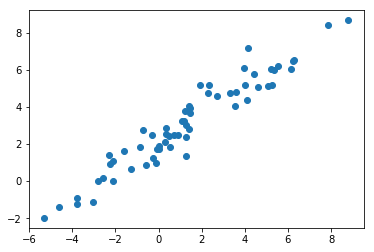

In [33]:
plt.scatter(mammals['log_body'],mammals['log_brain'])
plt.show()

In [34]:
log_lm = smf.ols(formula = 'log_brain~log_body', data = mammals).fit()

In [35]:
print(log_lm.summary())

                            OLS Regression Results                            
Dep. Variable:              log_brain   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     697.4
Date:                Sat, 18 Aug 2018   Prob (F-statistic):           9.84e-35
Time:                        10:43:47   Log-Likelihood:                -64.336
No. Observations:                  62   AIC:                             132.7
Df Residuals:                      60   BIC:                             136.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1348      0.096     22.227      0.0

In [36]:
log_lm.params

Intercept    2.134789
log_body     0.751686
dtype: float64

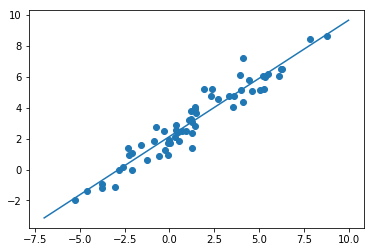

In [37]:
plt.scatter(mammals['log_body'],mammals['log_brain'])
X_plot = np.linspace(-7,10,50)
plt.plot(X_plot, X_plot*log_lm.params[1] + log_lm.params[0])
plt.show()

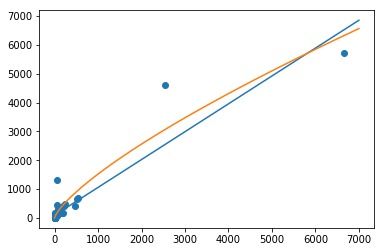

In [38]:
plt.scatter(mammals['body'],mammals['brain'])
X_plot = np.linspace(0,7000,10000)
plt.plot(X_plot, X_plot*regression2.params[1] + regression2.params[0])
plt.plot(X_plot, np.exp(log_lm.params[0])*X_plot**log_lm.params[1])
plt.show()

In [139]:
# Unit Scaling

In [39]:
from sklearn import preprocessing

In [40]:
scaler = preprocessing.MinMaxScaler()

In [43]:
mammals_minmax = pd.DataFrame(scaler.fit_transform(mammals[['body','brain']]),\
                             columns = ['body','brain'])

In [45]:
mammals_minmax.head()

,body,brain
0,0.000508,0.007766
1,0.000071,0.002689
2,0.000202,0.001394
3,0.069882,0.074032
4,0.005459,0.020897


In [52]:
mammals_minmax.groupby(lambda idx: 0).agg(['min','max'])

body      brain     
   min  max   min  max
0  0.0  1.0   0.0  1.0

In [140]:
# Z-Score Scaling

In [54]:
scaler2 = preprocessing.StandardScaler()
mammals_std = pd.DataFrame(scaler2.fit_transform(mammals[['body','brain']]),
                          columns = ['body','brain'])

In [55]:
mammals_std.head()

,body,brain
0,-0.219094,-0.258613
1,-0.222351,-0.290041
2,-0.221376,-0.298061
3,0.298483,0.151576
4,-0.182155,-0.177334


In [56]:
mammals_std.groupby(lambda idx: 0).agg(['min','max'])

body               brain          
        min       max       min       max
0 -0.222884  7.237778 -0.306687  5.883379

In [141]:
# Polynomial Regression

In [57]:
mammals['body_squared'] = mammals['body']**2

In [58]:
# with StatsModels
poly_reg = smf.ols(formula = 'brain~body+body_squared',
                  data = mammals).fit()

In [59]:
print(poly_reg.params)

Intercept       19.115299
body             2.123929
body_squared    -0.000189
dtype: float64


In [60]:
poly_brain_pred = poly_reg.predict(exog=dict(body=new_body, 
                                             body_squared = new_body ** 2))

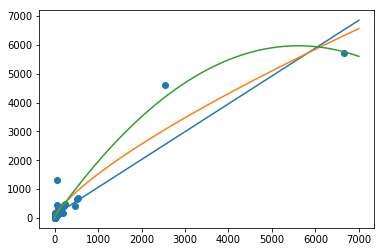

In [61]:
plt.scatter(mammals['body'],mammals['brain'])
X_plot = np.linspace(0,7000,10000)
plt.plot(X_plot, X_plot*regression2.params[1] + regression2.params[0])
plt.plot(X_plot, np.exp(log_lm.params[0])*X_plot**log_lm.params[1])
plt.plot(X_plot, poly_reg.params[0] + poly_reg.params[1]*X_plot + 
         poly_reg.params[2]*(X_plot**2))
plt.show()

In [62]:
# Shrinkage: LASSO & Ridge

In [63]:
# let's build a new feature in mammals dataset, for demo purposes

In [64]:
mammals['body_cubed'] = mammals['body'] ** 3

In [65]:
from sklearn import preprocessing

In [66]:
X = mammals[['body', 'body_squared', 'body_cubed']]
Y = mammals[['brain']]

In [67]:
Xscaled = preprocessing.StandardScaler().fit_transform(X)
Yscaled = preprocessing.StandardScaler().fit_transform(Y)

In [68]:
import sklearn.model_selection as ms

In [69]:
XTrain, XTest, YTrain, YTest =\
ms.train_test_split(Xscaled,Yscaled,test_size = 0.2, random_state = 42)

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso

In [72]:
lambda_range = linspace(0.001, 0.2, 25)

In [74]:
lambda_grid = [{'alpha':lambda_range}]

In [75]:
lambda_grid

[{'alpha': array([ 0.001     ,  0.00929167,  0.01758333,  0.025875  ,  0.03416667,
          0.04245833,  0.05075   ,  0.05904167,  0.06733333,  0.075625  ,
          0.08391667,  0.09220833,  0.1005    ,  0.10879167,  0.11708333,
          0.125375  ,  0.13366667,  0.14195833,  0.15025   ,  0.15854167,
          0.16683333,  0.175125  ,  0.18341667,  0.19170833,  0.2       ])}]

In [76]:
model1 = Ridge(max_iter=10000)
cv_ridge = GridSearchCV(estimator=model1, 
                       param_grid = lambda_grid,
                       cv = ms.KFold(n_splits=20))

In [77]:
cv_ridge.fit(XTrain, YTrain)

GridSearchCV(cv=KFold(n_splits=20, random_state=None, shuffle=False),
       error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'alpha': array([ 0.001  ,  0.00929,  0.01758,  0.02588,  0.03417,  0.04246,
        0.05075,  0.05904,  0.06733,  0.07563,  0.08392,  0.09221,
        0.1005 ,  0.10879,  0.11708,  0.12538,  0.13367,  0.14196,
        0.15025,  0.15854,  0.16683,  0.17513,  0.18342,  0.19171,  0.2    ])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [80]:
model2 = Lasso(max_iter=10000)
cv_lasso = GridSearchCV(estimator=model2,
                       param_grid = lambda_grid,
                       cv = ms.KFold(n_splits=20))

In [81]:
cv_lasso.fit(XTrain, YTrain)

GridSearchCV(cv=KFold(n_splits=20, random_state=None, shuffle=False),
       error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'alpha': array([ 0.001  ,  0.00929,  0.01758,  0.02588,  0.03417,  0.04246,
        0.05075,  0.05904,  0.06733,  0.07563,  0.08392,  0.09221,
        0.1005 ,  0.10879,  0.11708,  0.12538,  0.13367,  0.14196,
        0.15025,  0.15854,  0.16683,  0.17513,  0.18342,  0.19171,  0.2    ])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [82]:
cv_ridge.best_params_['alpha']

0.13366666666666668

In [85]:
cv_lasso.best_params_['alpha']

0.0092916666666666668

In [86]:
# We can now use the parameters with the corresponding model to extract 
# the coefficients

In [ ]:
bestLambda